In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns


pd.options.mode.chained_assignment = None
%matplotlib inline


In [ ]:
def read_data(data = 'data_name')->pd.DataFrame:
  df = pd.read_csv(data, delimiter = ';', low_memory = False)
  df['date'] = pd.to_datetime(df['date'], format='%y%m%d')
  return df

In [182]:
df = read_data(data = 'trans.csv')
df.head()

df.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352836 entries, 0 to 352835
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   trans_id    352836 non-null  int64         
 1   account_id  352835 non-null  float64       
 2   date        352835 non-null  datetime64[ns]
 3   type        352835 non-null  object        
 4   operation   292386 non-null  object        
 5   amount      352835 non-null  float64       
 6   balance     352835 non-null  float64       
 7   k_symbol    184836 non-null  object        
 8   bank        88527 non-null   object        
 9   account     93972 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 26.9+ MB


In [184]:
df.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

In [185]:
def filter_features(ls = [], df = pd.DataFrame)->pd.DataFrame:
  df = df[['date', 'account_id', 'type', 'amount']]
  if 'data' in ls:
    df['date'] = pd.to_datetime(df['date'], format='%y%m%d')
  return df




In [186]:
df_new = filter_features(ls = df.columns, df = df )
df_new

,date,account_id,type,amount
0,1993-01-01,2378.0,PRIJEM,700.0
1,1993-01-01,576.0,PRIJEM,900.0
2,1993-01-01,704.0,PRIJEM,1000.0
3,1993-01-01,3818.0,PRIJEM,600.0
4,1993-01-02,1972.0,PRIJEM,400.0
...,...,...,...,...
352831,1996-07-22,638.0,VYDAJ,6600.0
352832,1996-07-22,306.0,VYDAJ,2200.0
352833,1996-07-22,2435.0,PRIJEM,7357.0
352834,1996-07-22,8519.0,VYBER,3919.0


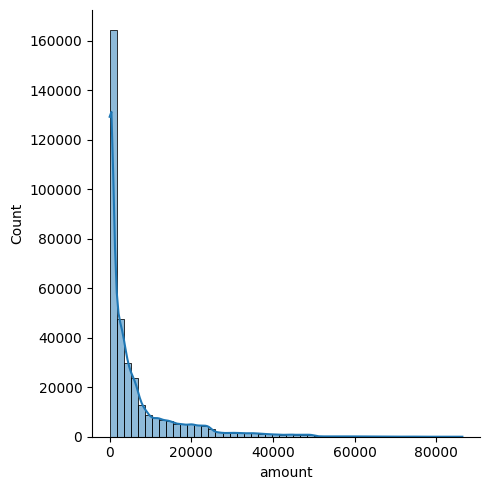

In [187]:
sns.displot(df_new['amount'], bins = 50, kde = True)

In [188]:
to_replace = {'PRIJEM': 'CREDIT', 'VYDAJ': 'WITHDRAWAL', 'VYBER': 'NOT SURE', 'DEBIT': 'WITHDRAWAL'}
df_new['type'] = df_new['type'].replace(to_replace)

In [189]:
df_new

,date,account_id,type,amount
0,1993-01-01,2378.0,CREDIT,700.0
1,1993-01-01,576.0,CREDIT,900.0
2,1993-01-01,704.0,CREDIT,1000.0
3,1993-01-01,3818.0,CREDIT,600.0
4,1993-01-02,1972.0,CREDIT,400.0
...,...,...,...,...
352831,1996-07-22,638.0,WITHDRAWAL,6600.0
352832,1996-07-22,306.0,WITHDRAWAL,2200.0
352833,1996-07-22,2435.0,CREDIT,7357.0
352834,1996-07-22,8519.0,NOT SURE,3919.0


<Axes: xlabel='type', ylabel='count'>

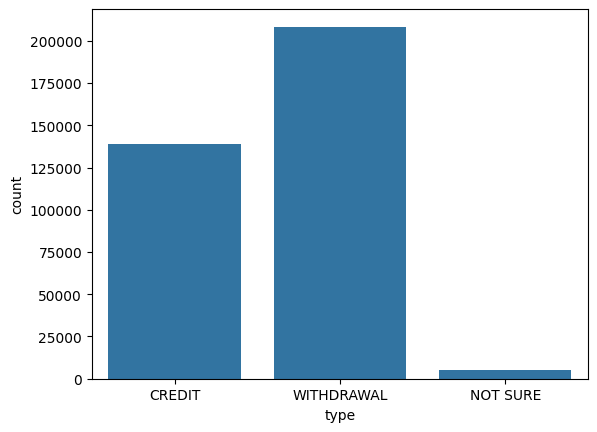

In [190]:
sns.countplot(x = 'type', data = df_new)

In [191]:
df_new.head()

,date,account_id,type,amount
0,1993-01-01,2378.0,CREDIT,700.0
1,1993-01-01,576.0,CREDIT,900.0
2,1993-01-01,704.0,CREDIT,1000.0
3,1993-01-01,3818.0,CREDIT,600.0
4,1993-01-02,1972.0,CREDIT,400.0


In [192]:
df_new = df_new[df_new['type'] == 'WITHDRAWAL']
df_new.sort_values(by = 'account_id')

,date,account_id,type,amount
240223,1995-12-05,1.0,WITHDRAWAL,2452.0
247561,1995-12-24,1.0,WITHDRAWAL,540.0
255126,1996-01-05,1.0,WITHDRAWAL,2452.0
228193,1995-11-05,1.0,WITHDRAWAL,2452.0
307195,1996-04-17,1.0,WITHDRAWAL,2000.0
...,...,...,...,...
210826,1995-09-19,11382.0,WITHDRAWAL,6800.0
246378,1995-12-18,11382.0,WITHDRAWAL,36000.0
324395,1996-05-31,11382.0,WITHDRAWAL,4.3
282490,1996-02-29,11382.0,WITHDRAWAL,14.6


In [193]:
df_new.set_index('date',inplace = True)
df_new[0:5]

,account_id,type,amount
date,,,
1993-01-31,2378.0,WITHDRAWAL,34700.0
1993-02-03,485.0,WITHDRAWAL,25300.0
1993-02-06,3510.0,WITHDRAWAL,1600.0
1993-02-07,2378.0,WITHDRAWAL,9612.0
1993-02-07,2122.0,WITHDRAWAL,14100.0


In [194]:
df_new['sum_5days'] = df_new.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).sum())
df_new['count_5days'] = df_new.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).count())

In [195]:
df_new

,account_id,type,amount,sum_5days,count_5days
date,,,,,
1993-01-31,2378.0,WITHDRAWAL,34700.0,34700.0,1.0
1993-02-03,485.0,WITHDRAWAL,25300.0,25300.0,1.0
1993-02-06,3510.0,WITHDRAWAL,1600.0,1600.0,1.0
1993-02-07,2378.0,WITHDRAWAL,9612.0,9612.0,1.0
1993-02-07,2122.0,WITHDRAWAL,14100.0,14100.0,1.0
...,...,...,...,...,...
1996-07-22,11138.0,WITHDRAWAL,16600.0,16600.0,1.0
1996-07-22,3815.0,WITHDRAWAL,10400.0,10400.0,1.0
1996-07-22,337.0,WITHDRAWAL,4800.0,4800.0,1.0


<ipython-input-196-7d5006343197>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['sum_5days'], bins=50)


<Axes: xlabel='sum_5days', ylabel='Density'>

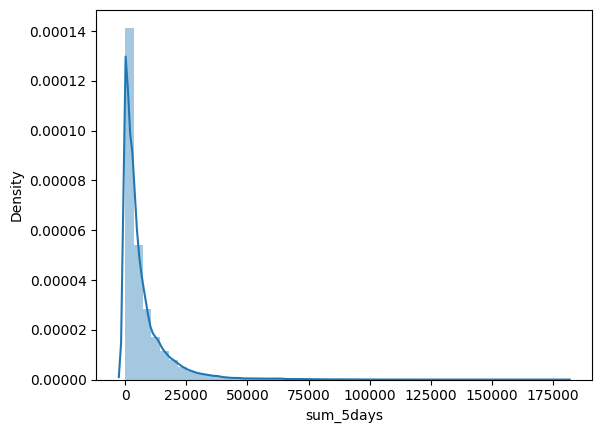

In [196]:
sns.distplot(df_new['sum_5days'], bins=50)

# sns.countplot(x='count_5days', data=df_new)

# sns.catplot(x="count_5days", y="sum_5days",
#             kind="box", data=df_new, order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#             aspect=3.0)


<Axes: xlabel='count_5days', ylabel='count'>

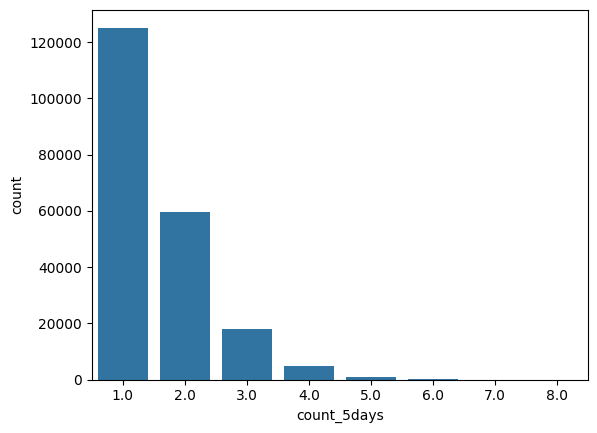

In [197]:
sns.countplot(x='count_5days', data=df_new)


In [198]:
!pip install pyod

In [199]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


anomaly_proportion = 0.001

clf_name = 'Anomaly Detection - Isolation Forest'
clf = IForest(contamination = anomaly_proportion)

X = df_new[['count_5days', 'sum_5days']]

clf.fit(X)

# get the prediction labels and outlier scores of the training data
df_new['y_pred'] = clf.labels_ # binary labels (0: inliers, 1: outliers)
df_new['y_scores'] = clf.decision_scores_ # raw outlier scores. The bigger the number the greater the anomaly.



In [200]:
df_new[df_new['y_pred'] == 1]

,account_id,type,amount,sum_5days,count_5days,y_pred,y_scores
date,,,,,,,
1993-05-22,2378.0,WITHDRAWAL,60000.0,136300.0,3.0,1,0.002554
1993-05-31,3760.0,WITHDRAWAL,14.6,111314.6,3.0,1,0.001487
1993-06-10,7231.0,WITHDRAWAL,76500.0,76500.0,1.0,1,0.007485
1993-06-17,9707.0,WITHDRAWAL,61100.0,106200.0,3.0,1,0.001487
1993-06-18,5740.0,WITHDRAWAL,54300.0,110500.0,3.0,1,0.001487
...,...,...,...,...,...,...,...
1996-07-12,5422.0,WITHDRAWAL,6148.0,101880.0,5.0,1,0.048249
1996-07-12,2247.0,WITHDRAWAL,592.0,71851.0,4.0,1,0.003734
1996-07-13,2228.0,WITHDRAWAL,4625.0,71398.7,5.0,1,0.031477


Text(0, 0.5, '5-day sum of withdrawal transactions')

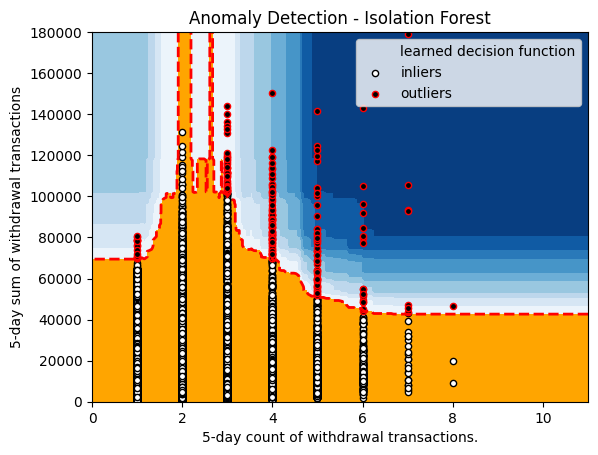

In [201]:
df_withdrawals = df_new
xx , yy = np.meshgrid(np.linspace(0, 11, 200), np.linspace(0, 180000, 200))

# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])*-1
Z = Z.reshape(xx.shape)


threshold = (df_withdrawals.loc[df_withdrawals['y_pred'] == 1, 'y_scores'].min()*-1)/2 + (df_withdrawals.loc[df_withdrawals['y_pred'] == 0, 'y_scores'].max()*-1)/2


subplot = plt.subplot(1, 1, 1)

# fill blue colormap from minimum anomaly score to threshold value
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

# draw red contour line where anomaly score is equal to threshold
a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')


msk = df_withdrawals['y_pred'] == 0
x = df_withdrawals.loc[msk, ['count_5days', 'sum_5days']].values

# scatter plot of inliers with white dots
b = subplot.scatter(x[:, 0], x[:, 1], c='white',s=20, edgecolor='k')


msk = df_withdrawals['y_pred'] == 1
x = df_withdrawals.loc[msk, ['count_5days', 'sum_5days']].values

# scatter plot of outliers with black dots
c = subplot.scatter(x[:, 0], x[:, 1], c='black',s=20, edgecolor='r')
subplot.axis('tight')



subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'inliers', 'outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='upper right')

subplot.set_title(clf_name)
subplot.set_xlim((0, 11))
subplot.set_ylim((0, 180000))

subplot.set_xlabel("5-day count of withdrawal transactions.")
subplot.set_ylabel("5-day sum of withdrawal transactions")

In [202]:
import pickle

# Assuming 'clf' is your trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)